In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from importlib import reload
import functions_model_eval_val as f
reload(f)

<module 'functions_model_eval_val' from 'e:\\Pima-Diabetes-Prediction\\notebooks\\functions_model_eval_val.py'>

In [9]:
df = pd.read_csv('../data/processed/data_remove_yes_balance_yes_scale_no.csv')

## ML Models

In [10]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns='outcome'), df['outcome'], test_size=0.2, random_state=42)

In [11]:
models = {
    "LogisticRegression": LogisticRegression(class_weight="balanced"),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(class_weight="balanced"),
    "RandomForestClassifier": RandomForestClassifier(class_weight="balanced"),
    "GaussianNB": GaussianNB(),
    "BaggingClassifier": BaggingClassifier(estimator=DecisionTreeClassifier(class_weight="balanced")),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier(estimator=DecisionTreeClassifier(class_weight="balanced")),
    "XGBClassifier": XGBClassifier(scale_pos_weight=1),
    "LGBMClassifier": LGBMClassifier(class_weight="balanced", verbose=-1)
}

# 2. Recorre cada modelo, ajústalo y evalúalo
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    classification_metrics, proba_predictions_dict = f.save_metrics(model, model_name, x_test, y_test, y_pred)

## Model Evaluation

### Classification Metrics

In [19]:
classification_metrics.sort_values(by='F1 Score', ascending=False)

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC,PR AUC
3,RandomForestClassifier,0.841837,0.813187,0.840909,0.826816,0.926820,0.925855
4,GaussianNB,0.836735,0.804348,0.840909,0.822222,0.932976,0.930321
0,LogisticRegression,0.836735,0.811111,0.829545,0.820225,0.920770,0.918359
8,XGBClassifier,0.826531,0.775510,0.863636,0.817204,0.895307,0.895310
1,KNeighborsClassifier,0.831633,0.802198,0.829545,0.815642,0.891256,0.867275
6,GradientBoostingClassifier,0.831633,0.802198,0.829545,0.815642,0.915299,0.913457
9,LGBMClassifier,0.826531,0.781250,0.852273,0.815217,0.911406,0.909378
2,DecisionTreeClassifier,0.821429,0.773196,0.852273,0.810811,0.824285,0.725300
7,AdaBoostClassifier,0.806122,0.750000,0.852273,0.797872,0.810396,0.705531
5,BaggingClassifier,0.816327,0.795455,0.795455,0.795455,0.896833,0.882660


### Confusion Matrix

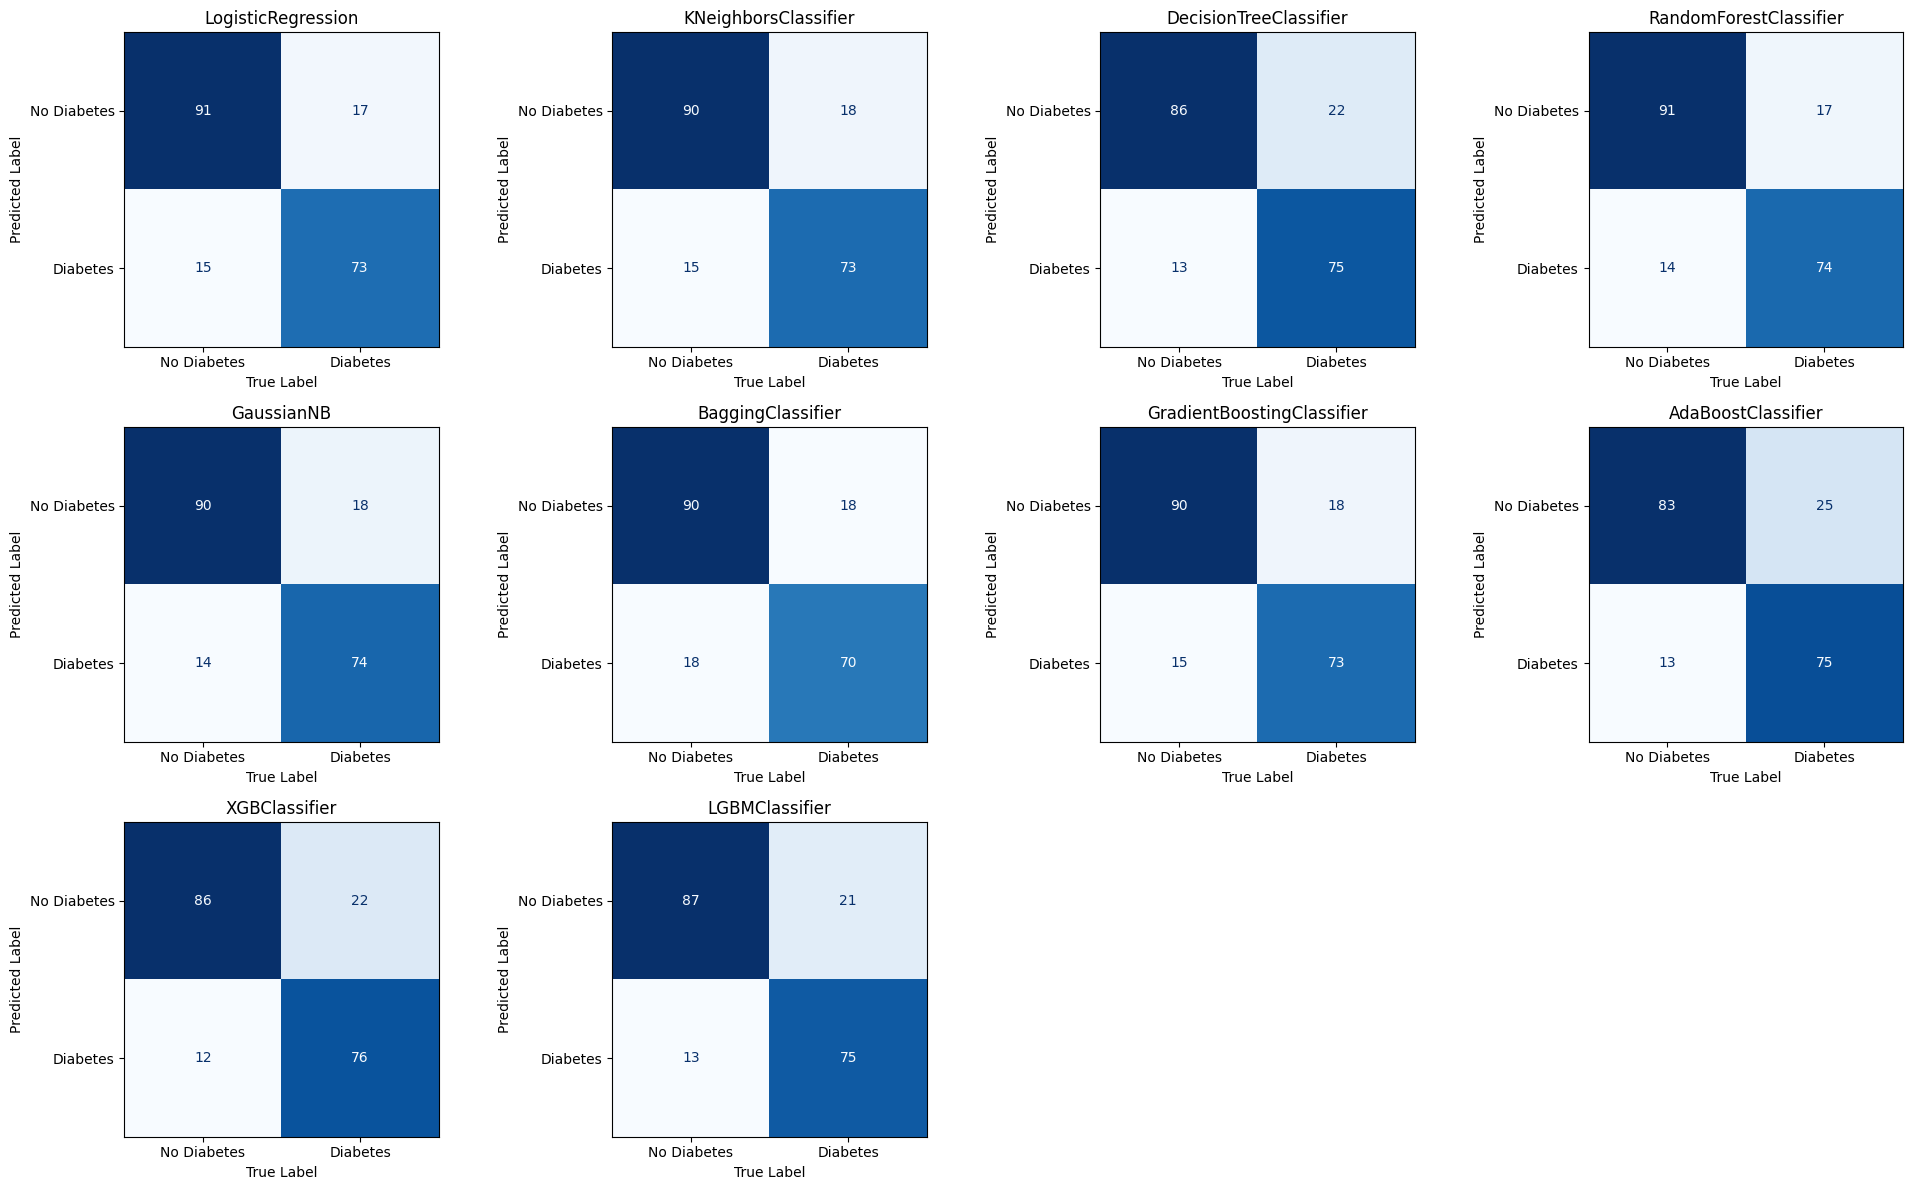

In [13]:
f.display_confusion_matrix(proba_predictions_dict ,labels=['No Diabetes', 'Diabetes'], cmap='Blues', models_per_row=4)

### ROC Curve

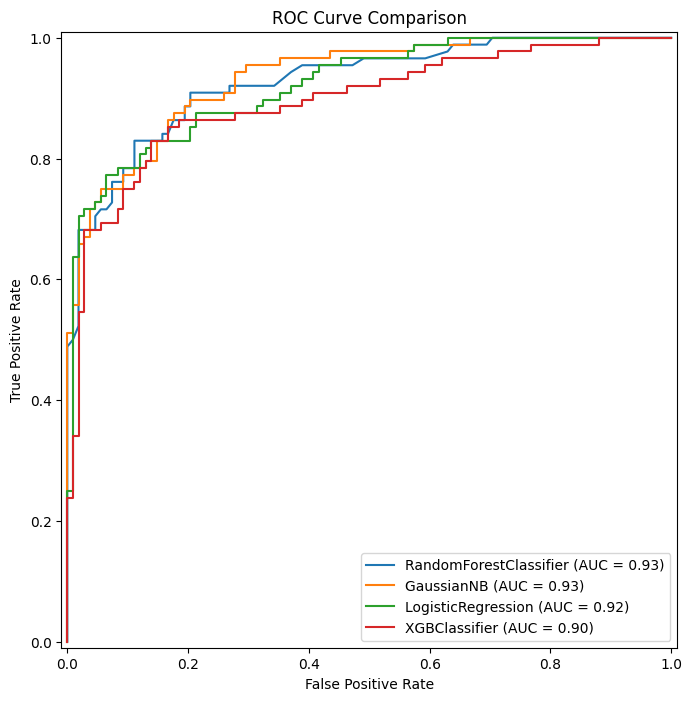

In [20]:
f.display_roc_curves(proba_predictions_dict, models=['RandomForestClassifier', "GaussianNB", "LogisticRegression","XGBClassifier"])

### Precision-Recall Curve

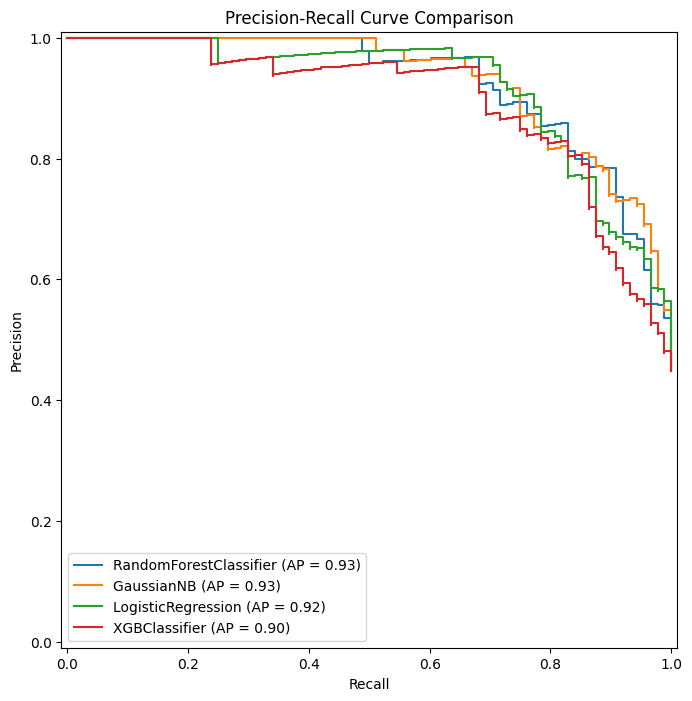

In [21]:
f.display_precision_recall_curve(proba_predictions_dict, models=['RandomForestClassifier', "GaussianNB", "LogisticRegression","XGBClassifier"])

## Model Validation

### K-Fold Validation

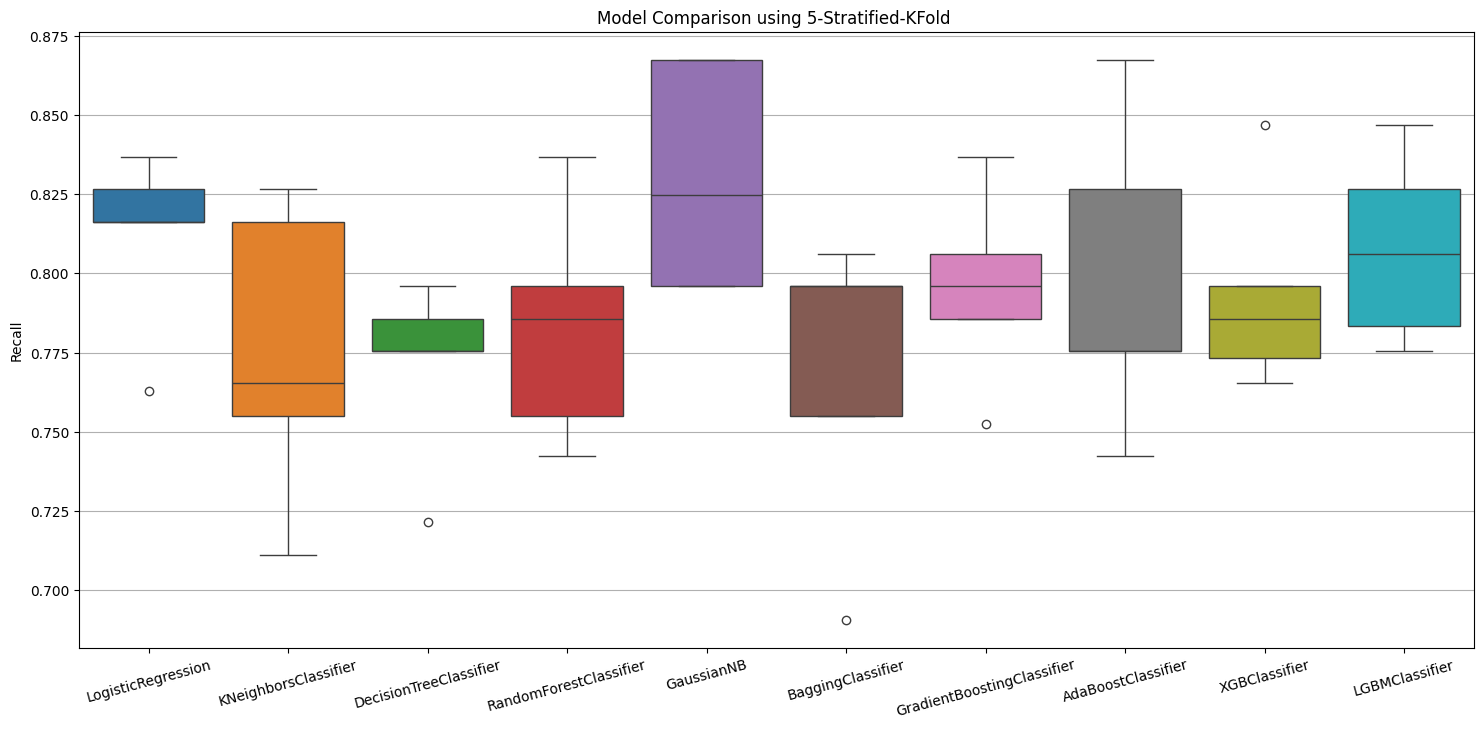

In [16]:
f.evaluate_models_with_kfold(models, df.drop(columns='outcome'), df['outcome'], cv=5, scoring='recall')

### Learning Curve

e:\Pima-Diabetes-Prediction\.venv\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
1 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "e:\Pima-Diabetes-Prediction\.venv\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "e:\Pima-Diabetes-Prediction\.venv\lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "e:\Pima-Diabetes-Prediction\.venv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1301, in fit
    raise ValueError(
ValueErr

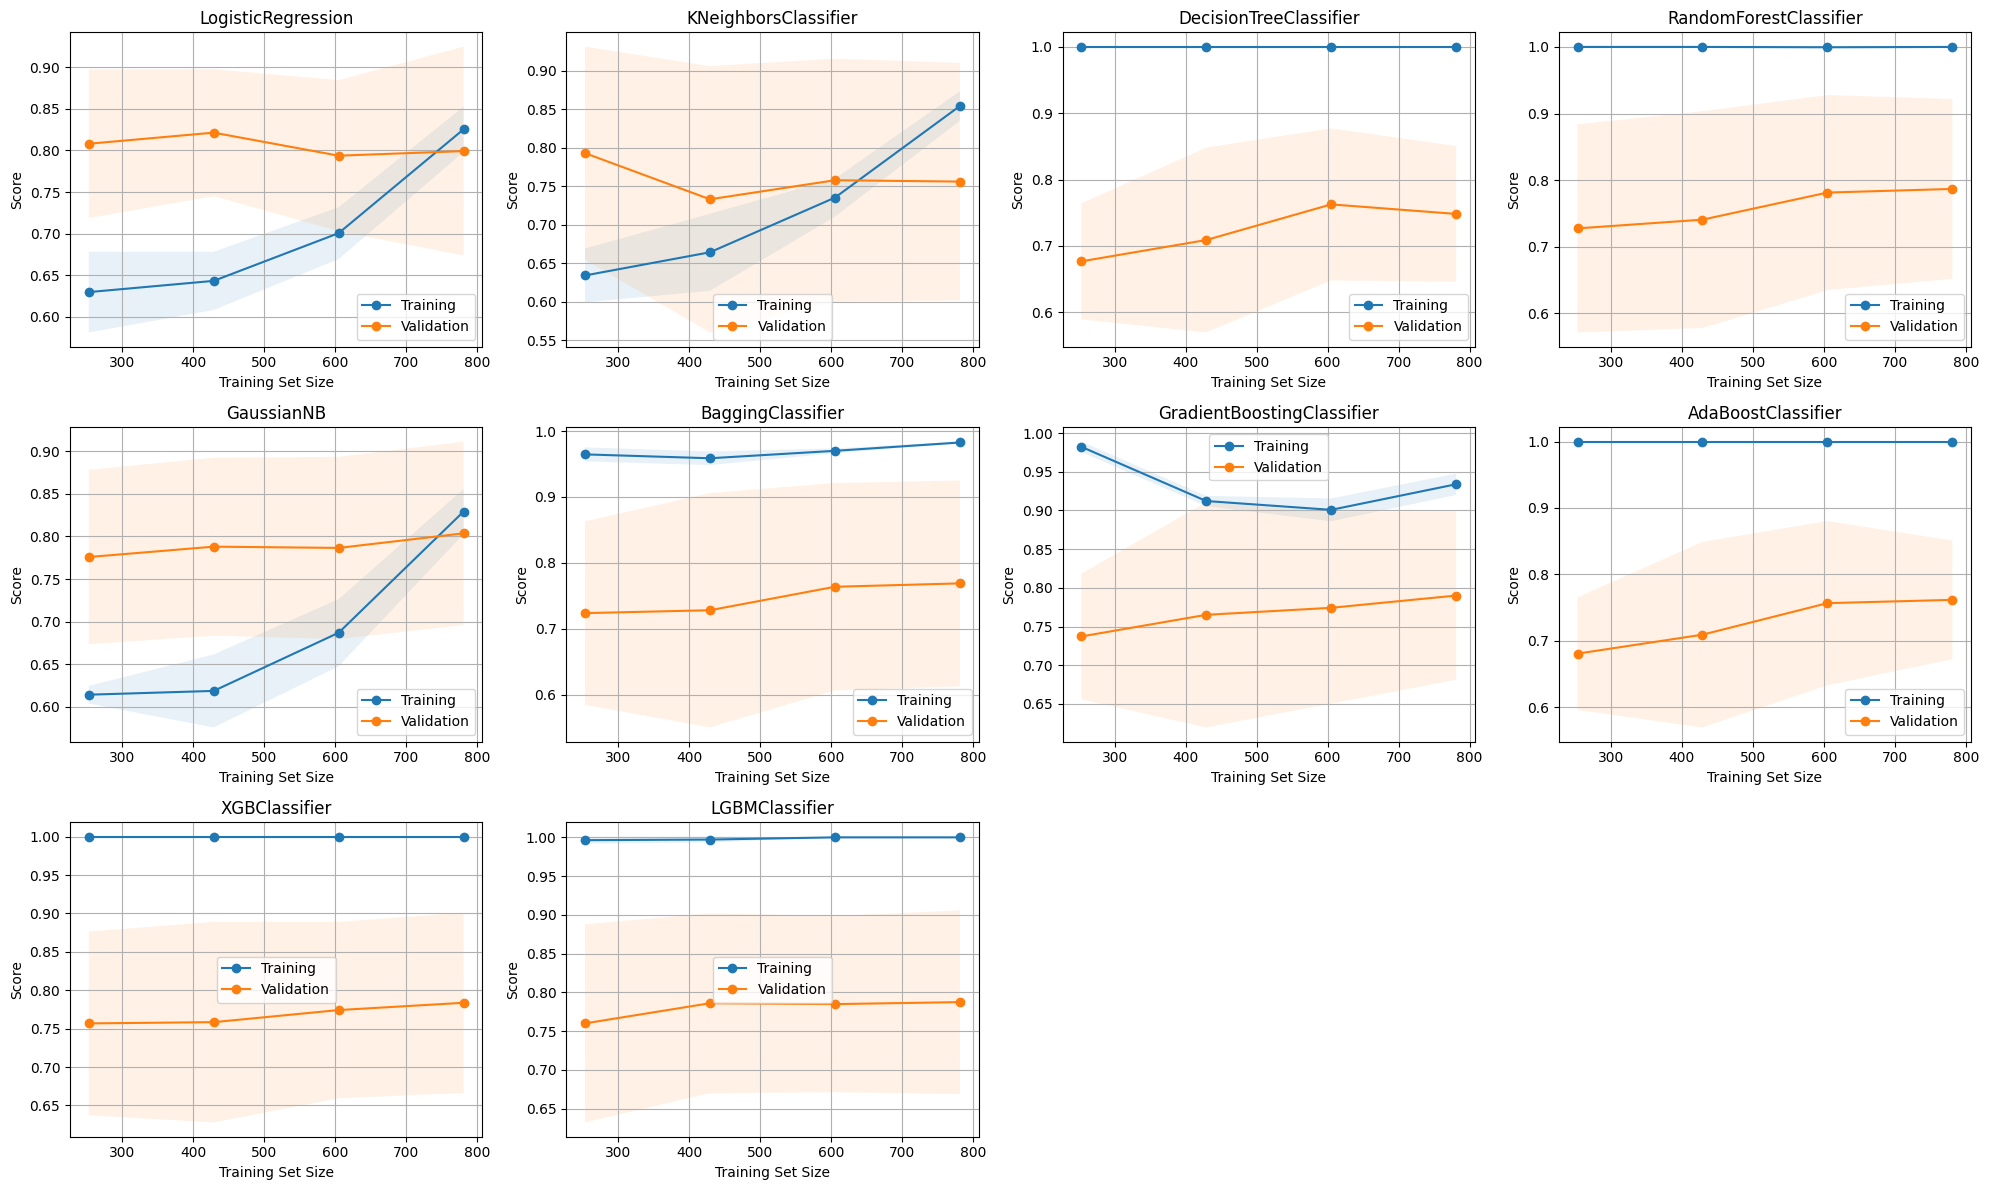

In [22]:
f.plot_learning_curves(models, df.drop(columns='outcome'), df['outcome'], cv=5, scoring='f1', n_jobs=1)